In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df= pd.read_csv("UpdatedResumeDataSet.csv")

In [3]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [4]:
df.shape

(962, 2)

# Exploring Categories

In [5]:
df['Category'].value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

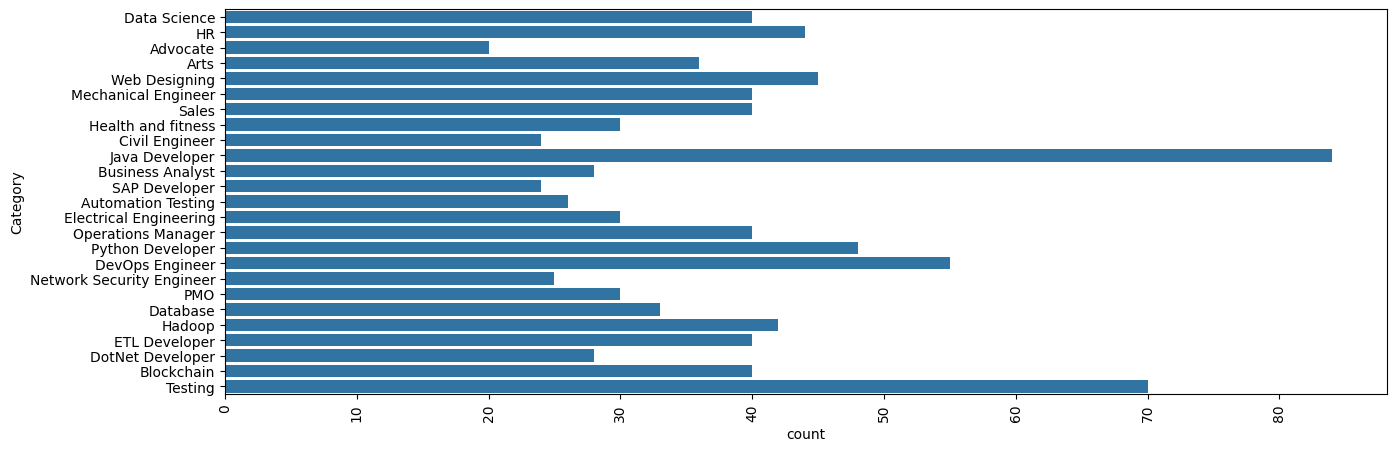

In [6]:
plt.figure(figsize=(15,5))
sns.countplot(df["Category"])
plt.xticks(rotation=90)
plt.show()


In [7]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

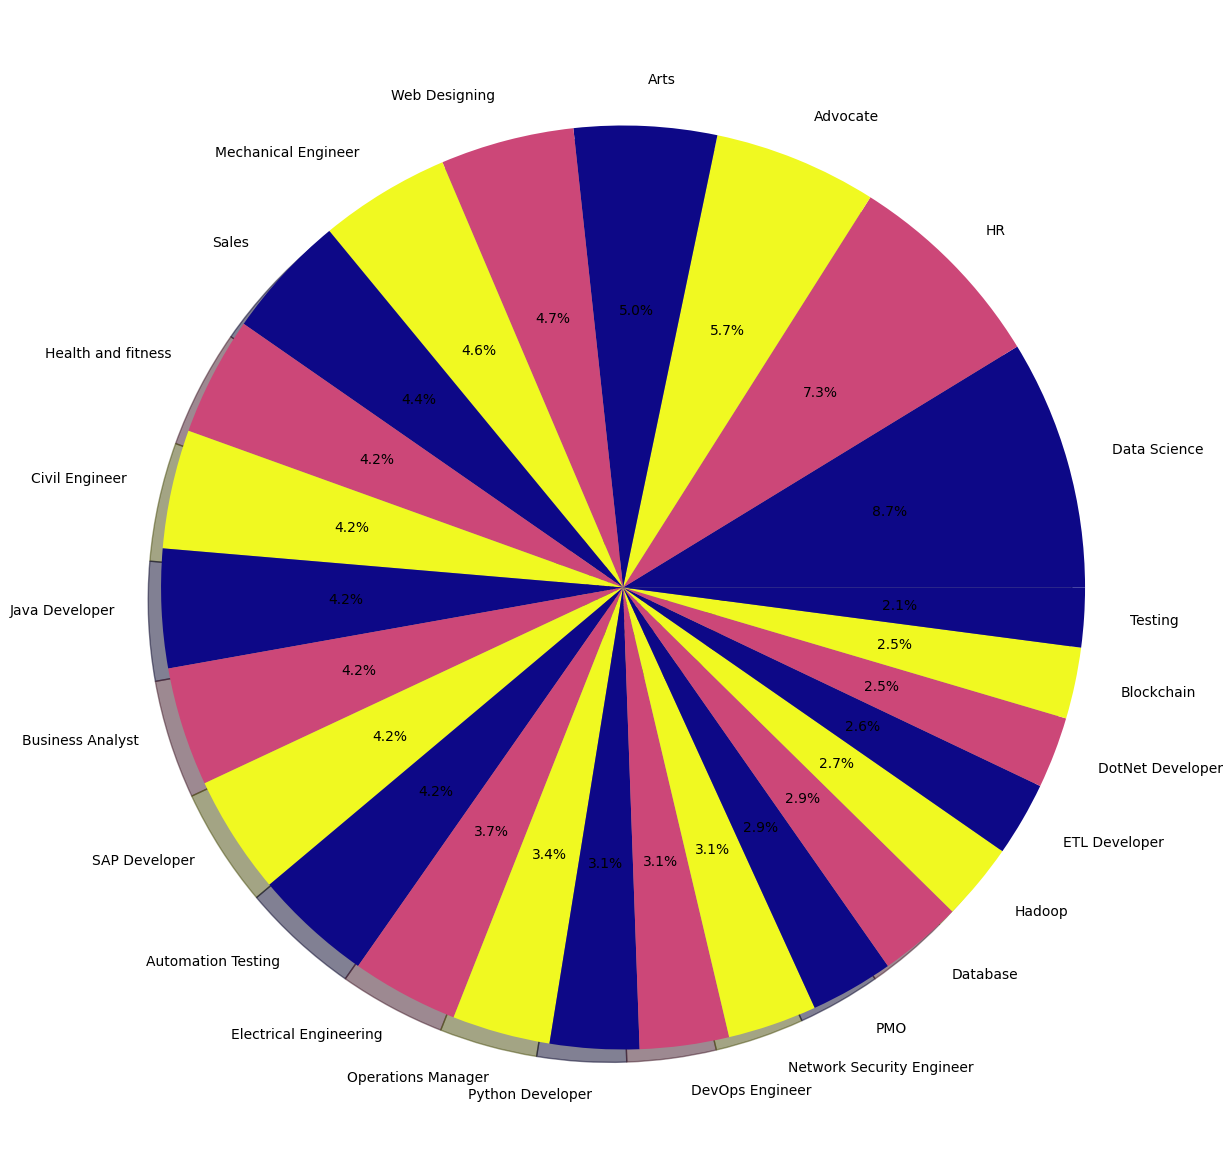

In [8]:
counts=df['Category'].value_counts()
labels= df['Category'].unique()
plt.figure(figsize=(15,15))
plt.pie(counts,labels=labels,autopct='%1.1f%%', shadow=True, colors=plt.cm.plasma(np.linspace(0,1,3)))

plt.show()

# Exploring Resume

In [9]:
df['Category'][0]

'Data Science'

In [10]:
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

# Cleaning Data
- 1.URL
- 2.hashtags
- 3.mentions
- 4.special letters
- 5.punctuations

In [11]:
import re

def cleanResume(txt):
    cleanText = re.sub('http\S+', ' ', txt)  # Removing URLs
    cleanText = re.sub('RT|cc', ' ', cleanText)  # Removing retweets and 'cc'
    cleanText = re.sub('#\S+', ' ', cleanText)  # Removing hashtags
    cleanText = re.sub('@\S+', ' ', cleanText)  # Removing mentions
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)  # Removing punctuation
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText)  # Removing non-ASCII characters
    cleanText = re.sub('\s+', ' ', cleanText)  # Removing extra whitespaces
    return cleanText

# Test the function
print(cleanResume("My # vgb website like ## is this http://helloworldprinting.com and access it acb@gmail.com"))


My vgb website like is this and a ess it acb 


In [12]:
df['Resume']=df['Resume'].apply(lambda x:cleanResume(x))

In [13]:
print(df['Resume'][0])

Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the r

# words into categorical values

In [14]:
df

,Category,Resume
0,Data Science,Skills Programming Languages Python pandas num...
1,Data Science,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,Areas of Interest Deep Learning Control System...
3,Data Science,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,Education Details MCA YMCAUST Faridabad Haryan...
...,...,...
957,Testing,Computer Skills Proficient in MS office Word B...
958,Testing,Willingness to a ept the challenges Positive ...
959,Testing,PERSONAL SKILLS Quick learner Eagerness to lea...
960,Testing,COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...


In [15]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [16]:
le.fit(df['Category'])
df['Category']= le.transform(df['Category'])
df.Category.unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

# Vectorization

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
tfidf.fit(df['Resume'])
requiredText= tfidf.transform(df["Resume"])

In [18]:
df

,Category,Resume
0,6,Skills Programming Languages Python pandas num...
1,6,Education Details May 2013 to May 2017 B E UIT...
2,6,Areas of Interest Deep Learning Control System...
3,6,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,Education Details MCA YMCAUST Faridabad Haryan...
...,...,...
957,23,Computer Skills Proficient in MS office Word B...
958,23,Willingness to a ept the challenges Positive ...
959,23,PERSONAL SKILLS Quick learner Eagerness to lea...
960,23,COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...


# Splitting

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train,y_test= train_test_split(requiredText,df['Category'], test_size=0.2, random_state=42 )

In [21]:
requiredText

<962x7351 sparse matrix of type '<class 'numpy.float64'>'
	with 164261 stored elements in Compressed Sparse Row format>

In [22]:
X_test.shape

(193, 7351)

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier


In [24]:
cls= OneVsRestClassifier(KNeighborsClassifier())




In [25]:
cls.fit(X_train,y_train) 



OneVsRestClassifier(estimator=KNeighborsClassifier())

In [26]:
y_pred= cls.predict(X_test)


In [27]:
print(y_pred)

[15 15 15 13 14 17 16  2  0 14 13 12 16 23 20  5  6  4 10  9 19  1 10 23
 23 21 22 22  2 12 18  1  8 24 11 23  7 12 24  8 18  6  8 19 24 23 21  1
 15  4 15 22 11  5 15 13  1 19  5 12 22 22 20 24 21 18 12 10 10 20 10  8
  9 21 17 21  0 17 16 14 15 11 11  8 20  3 19  8  0  2  9 10  2 23 20 20
 23 12 18 12  7 16  8 14 18  3 14 19 14 14 15 18  8  2 21 18 23 10 23  5
 11 15 12  3  5  3  7 12 19  8 20 19  3 15  9 19  1 23 21  5 20 15 16  7
  7  8 15 18  1 15 13 20  7  4 18 11  5 15  5 12  9 22 18 21  8 23  4 12
 24 16 15 22  8 22  3 16 23 23 12  7 16 18  5  3 18  8 23 23 20 21  6  7
 23]


In [28]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))




0.9844559585492227


In [1]:
# Prediction System


myresume="""
Jatin Agrawal
Ó +91 8949547874 R agrawaljatin656@gmail.com ° Jatin Agrawal  JatinAgrawal0
EXPERIENCE
ONE BCG - ONE Business Consulting Group June 2024 - Present
Software Engineer Trainee Chandigarh
• Developed and maintained backend services using .NET, C#, and MySQL Server, ensuring robust and scalable
solutions while leveraging Entity Framework for efficient data access and manipulation.
• Implemented the MVC design pattern and applied software architecture principles, including Meta and
SOLID, to create dynamic, maintainable web applications using .NET Core MVC.
PayRoll Project Team Member
ASP.NET (v6), Angular, C#, Entity Framework, Clean Architecture, SOLID Principles
• Maintained backend APIs for the PayRoll project using .NET, C#, and PostgreSQL, following Clean
Architecture principles. Created real-time and non-real-time report APIs, utilizing LINQ and stored
procedures for efficient data retrieval.
• Developed APIs for bulk data import and void import, enhancing data management capabilities. Applied
SOLID principles and Entity Framework to ensure scalable and maintainable solutions.
• Implemented unit tests to maintain code quality and reliability across all API functionalities.
EDUCATION
Chandigarh University Aug 2020 – May 2024
Bachelor of Engineering in Computer Science - CGPA : 8.1 Mohali, Punjab
TECHNICAL SKILLS
Languages:C/CPP, C#, Java, Python, SQL
Core Competencies : DBMS, Object-Oriented Programming (OOPs), SDLC, REST API, MVC, Entity Framework
Frameworks/ Tools: .NET, VS Code, GitHub, SourceTree, SQL Server, Pg Admin
Soft Skills : Adaptability, Strong work ethics, Team Coordination, Can-Do attitude
PROJECTS
Bulky App W June 2024
• Developed a comprehensive book management and purchasing application using ASP.NET Core and MVC
architecture. The application supports multiple user roles, including admin, company, customer, and employee,
each with distinct access levels and functionalities.
• Integrated Stripe payment gateway to facilitate secure transactions, accommodating immediate payments and
refunds for customers and deferred payments for companies, thereby enhancing financial flexibility and
security.
Technologies : C#, .NET, Entity Framework, SQL Server, MVC , Stripe, CSHTML, CSS Bootstrap
CryptoVault W April 2024
• Build a full-stack cryptocurrency trading platform using Spring Boot and React, with industry-standard tools
and frameworks.
• Enabled wallet functionality, including secure transfers, direct bank withdrawals, and easy balance top-ups.
• Implemented robust security features like user and 2-factor authentication, and simple password recovery.
Technologies : Backend (Spring Boot, MySQL, Spring Security), Frontend (React, Tailwind CSS),
Payment Gateways (Razorpay, Stripe), APIs (Gemini, CoinGecko) for high performance and security.
Expense Tracker W July 2024
• Developed a robust Expense Tracker WebApp using ASP.NET and Entity Framework with MVC architecture,
featuring user authentication and financial categorization for effective income and expense management.
• Integrated SyncFusion API for interactive data visualization, utilizing SQL Server for efficient data
management and real-time insights on a Bootstrap-based dashboard.
Technologies : C#, .NET, Entity Framework, SQL Server, MVC Architecture, CSHTML, CSS Bootstrap
EXTRACURRICULAR
• Coordinated college tech events and volunteered with the Art of Living.
• Helped local organization with various events (Blood donation, Tree plantation, Community cleanup).
• Coordinated and participated in a Guinness World Record event for the largest human waving Indian flag image.
 """

In [30]:
import pickle
# pickle.dump(requiredText,open('requiredText.pkl','wb'))
pickle.dump(tfidf, open('tfidf.pkl','wb'))
pickle.dump(cls,open('cls.pkl','wb'))

In [2]:
import pickle

# load the trained classifier
clf= pickle.load(open('cls.pkl','rb'))

# clean the input resume
cleaned_resume= cleanResume(myresume)

#transform the cleaned resume using the trained tfidfvectorizer
input_features=tfidf.transform([cleaned_resume])

# make the prediction using the loaded classifier
prediction_id= clf.predict(input_features)[0]

#map catregory id to category name
category_mapping={
15:"Java Developer",
23:"Testing",
8:"DevOps Engineer",
20:'Python Developer',
24:"Web Designing",
12:"HR",
13:"Hadoop",
3:"Blockchain",
10:"ETL Developer",
18:"Operations Manager",
6:"Data Science",
22:"Sales",
16:"Mechanical Engineer",
1:"Arts",
7:"Database",
11:"Electrical Engineering",
14:"Health and Fitness",
19:"PMO",
4:"Business Analyst",
9:"Dotnet Developer",
2:"Automation Testing",
17:"Network Security Engineer",
21:"SAP Developer",
5:"Civil Engineer",
0:"Advocate",

}

category_name=category_mapping.get(prediction_id,'unknown')
print("Predicted Category: ", category_name)

NameError: name 'cleanResume' is not defined